In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

## Introduction:
We use this heart disease classification dataset to predict which patients are most likely to suffer from a heart disease in the near future using the features given, such as Chest-pain type, age, Resting Blood Pressure, Max heart rate achieved etc. Nowadays, the heart disease is a serious problem and need people to react fast to save the patients' life. However, we would hard to know when the heart disease is coming, so we need to predict a heart attack when using these features. These features that we rely on are all the possible reason(s) that could trigger the heart attack. 

Read in the dataset. 

In [2]:
# Read CSV file into DataFrame df
heart_data = pd.read_csv('heart disease classification dataset.csv')
heart_data.drop(columns='id', axis=1, inplace=True)

# Show dataframe
heart_data.head()
# labels

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


We dropped the id column because id column does not help on data analysis.

### Before data cleaning, we need to separete our data from label and other data

In [3]:
data_Y = heart_data['target']
data_X = heart_data.drop(['target'],axis=1)

data_X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2


### Data cleaning, fill any null values with appropriate value

In [4]:
# check for any null values in cols
data_X.isna().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [5]:
# replace w/ mean of col
for col in data_X:
    if col != 'sex':
        data_X[col].fillna(data_X[col].mean(), inplace=True)
    if col == 'sex':
        counts = data_X[col].value_counts().index.tolist()
        data_X[col].fillna(counts[0],inplace=True)
        
#male is 0 and female is 1       
data_X = pd.get_dummies(data_X, columns= ["sex"], prefix = ["sex"])
data_X.head()  


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_female,sex_male
0,63,3,145.000000,233.0,1,0,150.0,0,2.3,0,0,1,0,1
1,37,2,130.000000,250.0,0,1,187.0,0,3.5,0,0,2,0,1
2,41,1,130.000000,204.0,0,0,172.0,0,1.4,2,0,2,1,0
3,56,1,120.000000,236.0,0,1,178.0,0,0.8,2,0,2,0,1
4,57,0,131.712375,354.0,0,1,163.0,1,0.6,2,0,2,1,0


In [6]:
#data exploration
data_X.describe()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sex_female,sex_male
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.712375,246.317881,0.148515,0.528053,149.865772,0.326733,1.039604,1.399340,0.729373,2.313531,0.316832,0.683168
std,9.082101,1.032052,17.511894,51.822273,0.356198,0.525860,22.376122,0.469794,1.161075,0.616226,1.022606,0.612277,0.466011,0.466011
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,61.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,1.000000
max,77.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>,
        <AxesSubplot:title={'center':'chol'}>],
       [<AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>,
        <AxesSubplot:title={'center':'exang'}>],
       [<AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>,
        <AxesSubplot:title={'center':'thal'}>],
       [<AxesSubplot:title={'center':'sex_female'}>,
        <AxesSubplot:title={'center':'sex_male'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

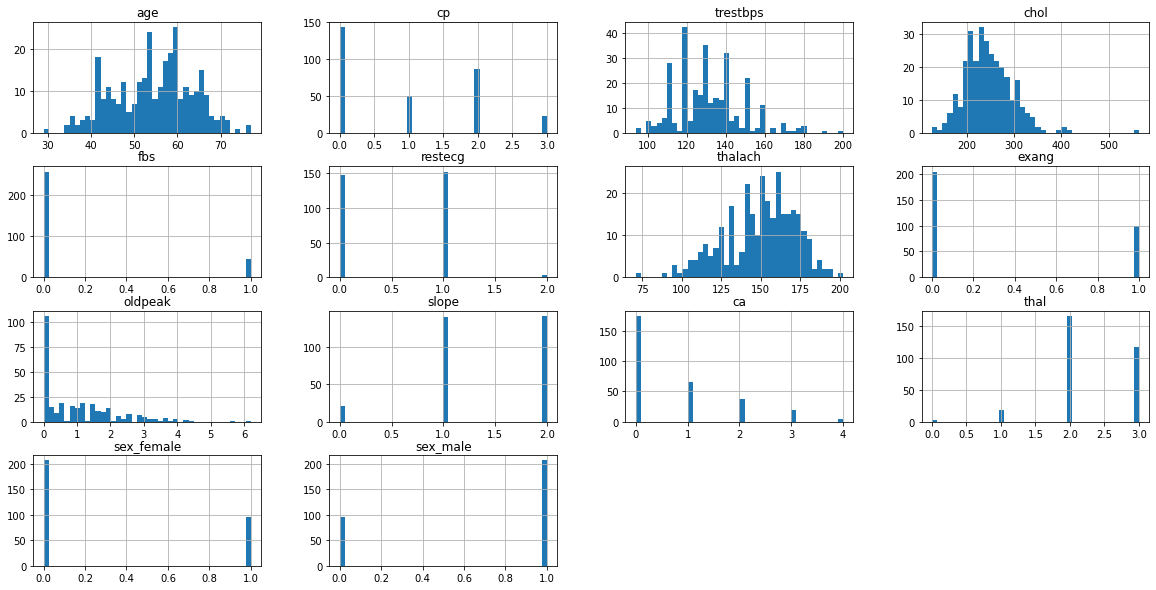

In [7]:
data_X.hist(bins=40, figsize=(20,10))

<AxesSubplot:xlabel='age', ylabel='trestbps'>

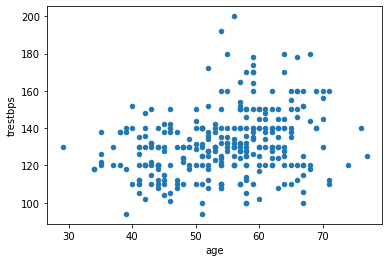

In [8]:
data_X.plot.scatter(x='age', y='trestbps')

<AxesSubplot:xlabel='age', ylabel='thalach'>

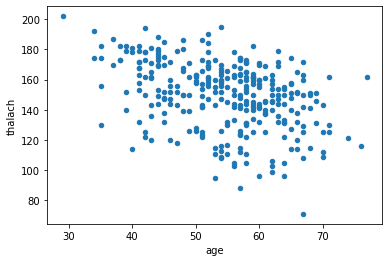

In [9]:
data_X.plot.scatter(x='age', y='thalach')

People who are 50-60 years old tend to have a high max heart rate

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
# your code goes here
# data_Y = heart_data['target']
#data_X = heart_data.drop(['target'],axis=1)
# data_Y = data['label']
# data_X = data.drop(['label'],axis=1)
print("x shape", data_X.shape)
print("x shape", data_Y.shape)
X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.20)

print("X_train=",X_train.shape, " y_train=", y_train.shape)
print("X_test=",X_test.shape, " y_test=", y_test.shape)

clf = DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_train, y_train)

# tree.plot_tree(clf)
preds = clf.predict(X_test)
print('Accuracy on test data is:', (accuracy_score(y_test, preds)))

# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(clf, 
#                    feature_names=data_X.feature_names,
#                    class_names=data_Y.target_names,
#                    filled=True)


x shape (303, 14)
x shape (303,)
X_train= (242, 14)  y_train= (242,)
X_test= (61, 14)  y_test= (61,)
Accuracy on test data is: 0.819672131147541


In [11]:
# Max_depth
clf1 = DecisionTreeClassifier(criterion='entropy',max_depth=4)
clf1 = clf1.fit(X_train, y_train)
preds1 = clf1.predict(X_test)
print('Accuracy on test data is:', (accuracy_score(y_test, preds1)))




Accuracy on test data is: 0.7540983606557377


In [12]:
#min_samples_split

clf2 = DecisionTreeClassifier(criterion='entropy',min_samples_split=5)
clf2 = clf2.fit(X_train, y_train)
preds2 = clf2.predict(X_test)
print('Accuracy on test data is:', (accuracy_score(y_test, preds2)))

Accuracy on test data is: 0.6065573770491803


In [13]:
#min_sample_leaf

clf3 = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=2)
clf3 = clf3.fit(X_train, y_train)
preds3 = clf3.predict(X_test)
print('Accuracy on test data is:', (accuracy_score(y_test, preds3)))

Accuracy on test data is: 0.6065573770491803


In [14]:
#min_impurtity_decrease

clf4 = DecisionTreeClassifier(criterion='entropy',min_impurity_decrease=3)
clf4 = clf4.fit(X_train, y_train)
preds4 = clf4.predict(X_test)
print('Accuracy on test data is:', (accuracy_score(y_test, preds4)))

Accuracy on test data is: 0.5901639344262295


In [15]:
#gini

clf5 = DecisionTreeClassifier(criterion='gini')
clf5 = clf5.fit(X_train, y_train)
preds5 = clf5.predict(X_test)
print('Accuracy on test data is:', (accuracy_score(y_test, preds5)))

Accuracy on test data is: 0.639344262295082


In [19]:
# cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, data_X, data_Y, cv=10) 
print("Scores:", scores)                                            

print("Accuracy:", scores.mean()*100)

Scores: [0.70967742 0.80645161 0.90322581 0.76666667 0.76666667 0.8
 0.6        0.73333333 0.73333333 0.83333333]
Accuracy: 76.52688172043011


In [26]:
#nested Cross Validation
from sklearn.model_selection import GridSearchCV



params = {"max_depth": [5, 10 , 15, 20 ] , 
         "min_samples_leaf": [5, 10, 15, 20],
         "max_features" : [5,10,14]}

grid_search = GridSearchCV(clf, params, cv=5, scoring='accuracy')

grid_search.fit(data_X, data_Y)

print(grid_search.best_params_)
#best 'max_depth': 14, 'max_features': 10, 'min_samples_leaf': 11
#Accuracy: 83.80874316939891
print("Accuracy:", grid_search.best_score_*100)

{'max_depth': 10, 'max_features': 14, 'min_samples_leaf': 15}
Accuracy: 82.15846994535518


In [27]:
# offical accurary

nested_score = cross_val_score(grid_search, data_X, data_Y, cv=5)
#best result is 80
print("Accuracy:", nested_score.mean()*100)

Accuracy: 79.5191256830601
